<a href="https://colab.research.google.com/github/Joykareko/Data-Science-Projects/blob/main/Gold_Price_Prediction_ML_Project_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loading the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
#loading the dataset
gold_data = pd.read_csv('/content/gld_price_data.csv')
gold_data.head(3)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492


In [3]:
gold_data.tail(3)

,Date,SPX,GLD,USO,SLV,EUR/USD
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
#checking the shape
gold_data.shape

(2290, 6)

In [5]:
#missing values?
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
#checking statistics
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
#correlation
correlation = gold_data.corr()

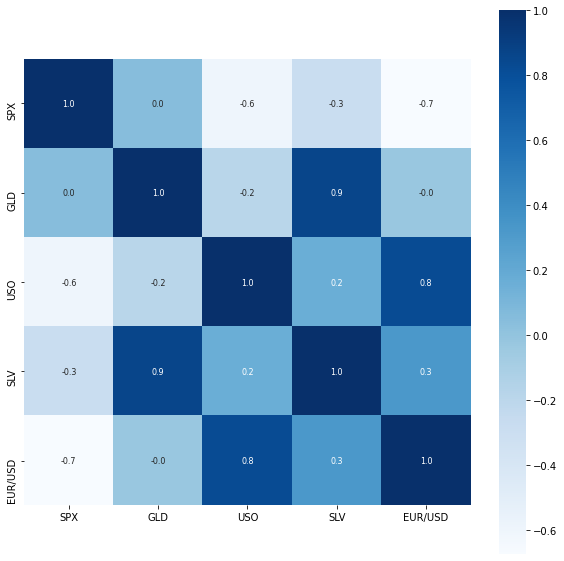

In [9]:
#plotting the heatmap
plt.figure(figsize = (10,10))
sns.heatmap(correlation,cbar = True, square= True, fmt = '.1f',annot = True,annot_kws = {'size':8}, cmap = 'Blues')


In [10]:
#correlation values
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


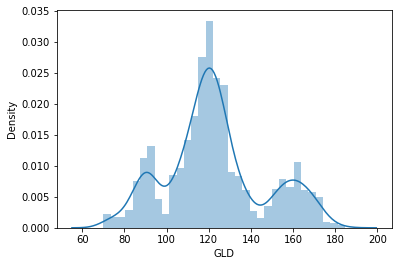

In [11]:
#checking the distribution plot
sns.distplot(gold_data['GLD'])

In [12]:
#splitting features and target
X = gold_data.drop(columns = ['Date','GLD'], axis = 1)
Y = gold_data['GLD']

In [13]:
#splitting to training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2 , random_state = 2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1832, 4) (458, 4) (1832,) (458,)


In [14]:
regressor = RandomForestRegressor()
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
testing_data_pred = regressor.predict(X_test)

In [16]:
error_score = metrics.r2_score(Y_test,testing_data_pred)
print('R score:',error_score)

R score: 0.9890144147034147


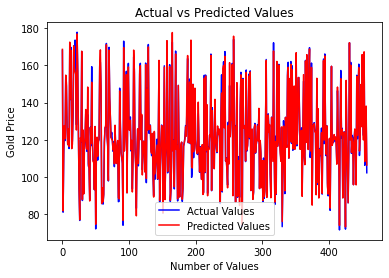

In [17]:
#comparing actual and predicted values
Y_test = list(Y_test)
plt.plot(Y_test,color = 'blue', label = 'Actual Values')
plt.plot(testing_data_pred, color = 'red', label = 'Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()